<a href="https://colab.research.google.com/github/shoabahamed/khanacademy-statistics-and-probability/blob/main/differentways_to_find_best_fitline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<p>Creating fake datas where x is Area of a building and y is The Price corrospoding to it</p>

In [18]:
datas = {'Area': [15, 20, 22, 23, 24, 25, 28, 30 , 35, 39, 40, 43, 45, 50],
            'Price': [200, 260, 354, 376, 335, 380, 459, 530, 600, 685, 700, 735, 800, 955]}

df = pd.DataFrame(datas)
df.head()

,Area,Price
0,15,200
1,20,260
2,22,354
3,23,376
4,24,335


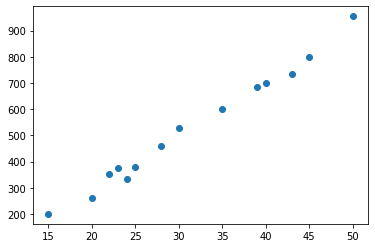

In [19]:
plt.scatter(df['Area'], df['Price'])
plt.show()